## **Network Analysis for Game of Thrones**

In [1]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [2]:
id = ['1MLrE43iFlmfCrVrYLF0cUb9SBbrCmWIB','1Mvn_LBwJYgoDFFV0Meu2U3wX-CkHckCv','1snXvNoTnCz4T5vNyUtFXphASQk7XjHvV','11ogHToiLbDA041KkuHAyqHVE5U61ENL8','18dygGP2LDGQF-caB1KLzOTThGQiuv_TH']
print(id)

['1MLrE43iFlmfCrVrYLF0cUb9SBbrCmWIB', '1Mvn_LBwJYgoDFFV0Meu2U3wX-CkHckCv', '1snXvNoTnCz4T5vNyUtFXphASQk7XjHvV', '11ogHToiLbDA041KkuHAyqHVE5U61ENL8', '18dygGP2LDGQF-caB1KLzOTThGQiuv_TH']


In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
df_book = []

for i in id:
  downloaded = drive.CreateFile({'id':i}) 
  downloaded.GetContentFile('data.csv') 
  df_book.append(pd.read_csv('data.csv'))

df = pd.concat(df_book)
df.head()

,Source,Target,Type,weight,book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,1.0
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,1.0
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,1.0
3,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,1.0
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Undirected,4,1.0


In [5]:
# number of row and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3909 entries, 0 to 759
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Source  3909 non-null   object 
 1   Target  3909 non-null   object 
 2   Type    3909 non-null   object 
 3   weight  3909 non-null   int64  
 4   book    3908 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 183.2+ KB


In [6]:
# check null data
df.isnull().sum()

Source    0
Target    0
Type      0
weight    0
book      1
dtype: int64

In [7]:
# drop rows with null values
df = df.dropna()
df.isnull().sum()

Source    0
Target    0
Type      0
weight    0
book      0
dtype: int64

In [8]:
# give prefix 'Book' before the book column
df.book = df.book.apply(int)
df.book = 'Book ' + df.book.map(str)

df.head()

,Source,Target,Type,weight,book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,Book 1
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,Book 1
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,Book 1
3,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,Book 1
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Undirected,4,Book 1


In [9]:
df.describe()

,weight
count,3908.000000
mean,8.348516
std,11.148936
min,3.000000
25%,3.000000
50%,5.000000
75%,9.000000
max,291.000000


# **Exploratory Data Analysis**

## 10 Characters with Most Appearence as Source and Target

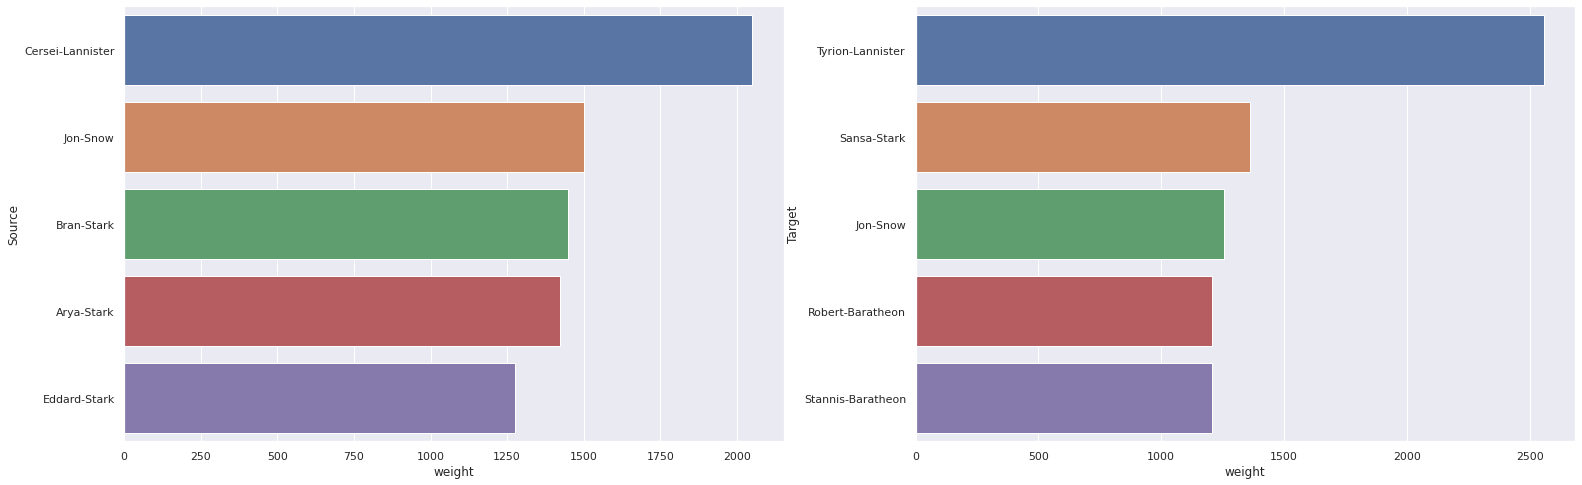

In [10]:
df1 = df.groupby(['Source']).sum()
df1.reset_index(inplace=True)
df1 = df1.sort_values(by=['weight'], ascending=False)

df2 = df.groupby(['Target']).sum()
df2.reset_index(inplace=True)
df2 = df2.sort_values(by=['weight'], ascending=False)

fig, axes = plt.subplots(1,2, figsize=(26,8),sharex=False, sharey=False)

sns.barplot(y='Source', x='weight', data=df1.head(5),
             orient='h', ax=axes[0])

sns.barplot(y='Target',x='weight', data=df2.head(5),
            orient='h', ax=axes[1])

## 10 Characters with Most Appearence Either Source or Target

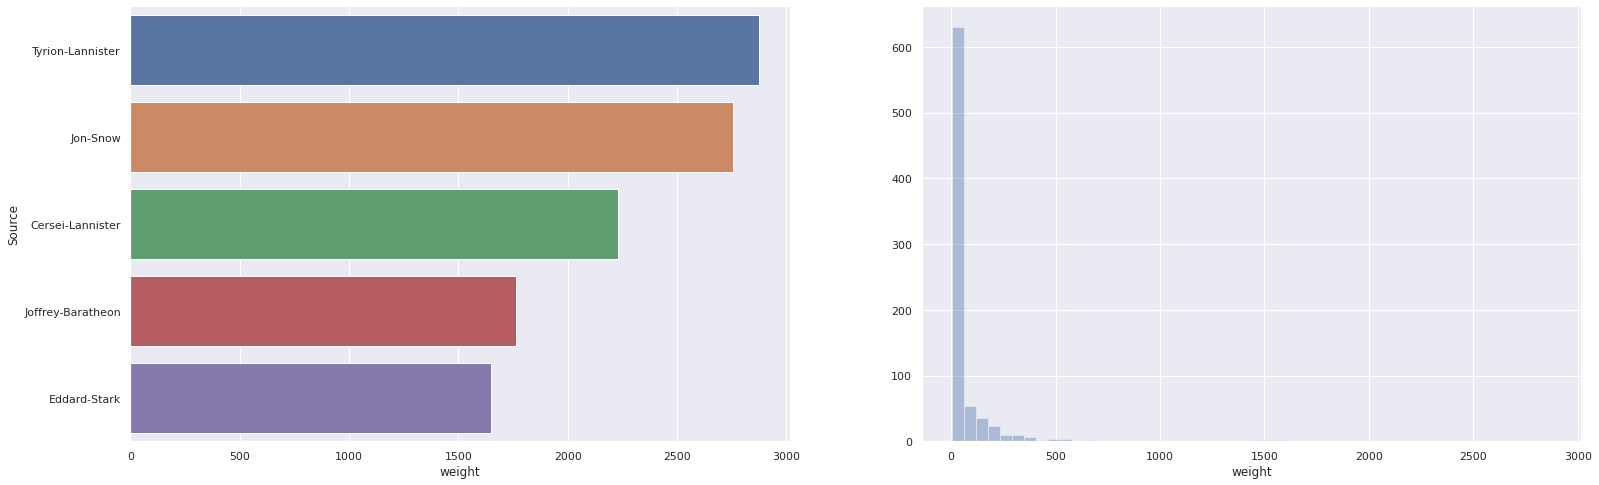

In [11]:
df2['Source'] = df2['Target']
combine = [df1[['Source','weight']],df2[['Source','weight']]]

df3 = pd.concat(combine)
df3 = df3.groupby(['Source']).sum()
df3.reset_index(inplace=True)
df3 = df3.sort_values(by=['weight'], ascending=False)

fig, axes = plt.subplots(1,2, figsize=(26,8),sharex=False, sharey=False)

sns.barplot(y='Source', x='weight', data=df3.head(5),
              orient='h', ax=axes[0])

sns.distplot(df3['weight'], kde=False, ax=axes[1])

# **Network Analysis**

In [12]:
import networkx as nx

G = nx.Graph()

In [13]:
book_list = list(df.book.unique())
nbook_list = len(book_list)
book_list

['Book 1', 'Book 2', 'Book 3', 'Book 4', 'Book 5']

In [14]:
df_book1 = df[df['book']=='Book 1']
df_book1.head()

,Source,Target,Type,weight,book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,Book 1
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,Book 1
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,Book 1
3,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,Book 1
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Undirected,4,Book 1


In [15]:
for i, edge in df_book1.iterrows():
  G.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])

In [16]:
G = {}
for i in range(len(book_list)):
  G[i]=nx.Graph()
  G_book = df[df['book']==book_list[i]]
  for _, edge in G_book.iterrows():
    G[i].add_edge(edge['Source'], edge['Target'], weight=edge['weight'])

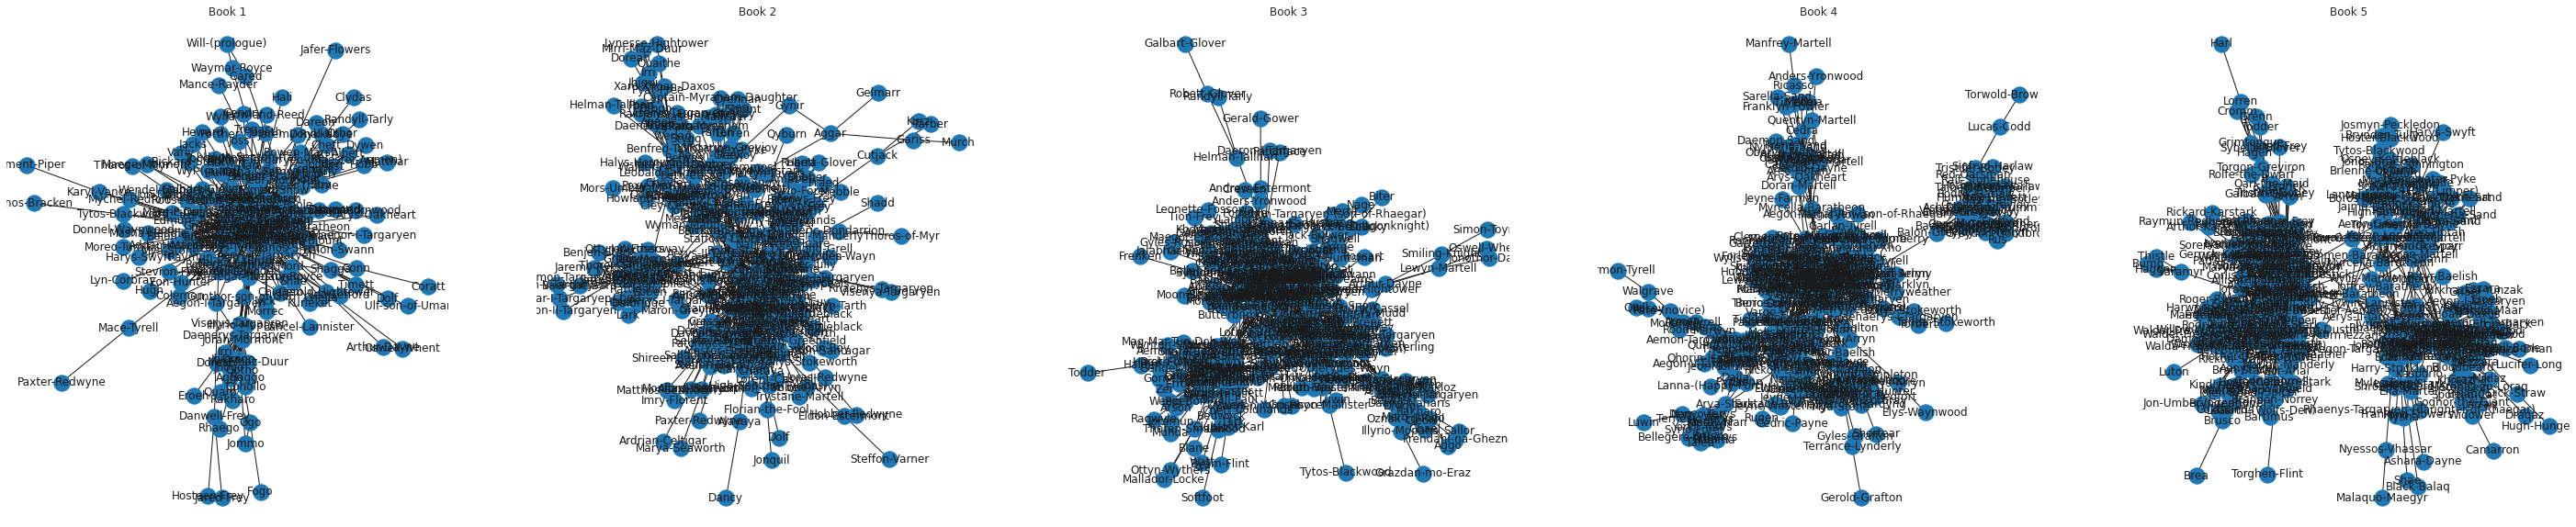

In [17]:
fig,axes = plt.subplots(1,5,figsize=(50,10))

for i in range(nbook_list):
  nx.draw(G[i],ax=axes[i], with_labels=True)
  axes[i].set_title(book_list[i])
  plt.plot

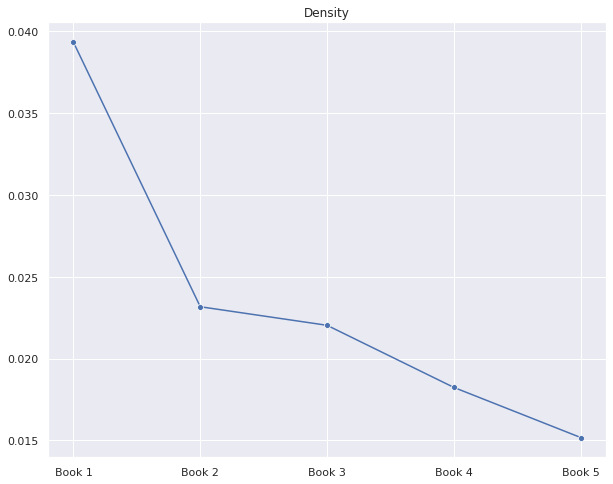

In [18]:
# density evolution of network

dense = []

plt.figure(figsize=(10,8))
for i in range(nbook_list):
  dense.append(nx.density(G[i]))
plt.title('Density')

sns.lineplot(y=dense, x=book_list, marker='o')

## Degree of Centrality

In [19]:
dc_book = {}
for i in range(len(book_list)):
  dc = nx.degree_centrality(G[i])
  dc_book[i] = sorted(dc.items(), key=lambda x:x[1], reverse=True)

dc_book_df = []
for i in range(len(book_list)):
  dc_book_df.append(pd.DataFrame(dc_book[i]))
  dc_book_df[i] = dc_book_df[i].rename(columns={0:'Character',1:'Degree Centrality'}, inplace=False)
  dc_book_df[i].insert(0,'Book','Book %d' %(i+1) )

for i in range(len(book_list)):
  print('Book ', i+1, '\n', dc_book_df[i].head(),  '\n')

Book  1 
      Book         Character  Degree Centrality
0  Book 1      Eddard-Stark           0.354839
1  Book 1  Robert-Baratheon           0.268817
2  Book 1  Tyrion-Lannister           0.247312
3  Book 1     Catelyn-Stark           0.231183
4  Book 1          Jon-Snow           0.198925 

Book  2 
      Book          Character  Degree Centrality
0  Book 2   Tyrion-Lannister           0.205426
1  Book 2  Joffrey-Baratheon           0.182171
2  Book 2   Cersei-Lannister           0.166667
3  Book 2         Arya-Stark           0.155039
4  Book 2  Stannis-Baratheon           0.143411 

Book  3 
      Book          Character  Degree Centrality
0  Book 3   Tyrion-Lannister           0.195364
1  Book 3           Jon-Snow           0.172185
2  Book 3  Joffrey-Baratheon           0.165563
3  Book 3         Robb-Stark           0.162252
4  Book 3        Sansa-Stark           0.158940 

Book  4 
      Book         Character  Degree Centrality
0  Book 4   Jaime-Lannister           0.234432
1 

In [20]:
# we take top 5 character in book 1 and book 5
char1 = list(dc_book_df[0]['Character'].head())

evol1 = []
for i in range(nbook_list):
  for j in range(len(char1)):
    evol1.append(dc_book_df[i][dc_book_df[i]['Character']==char1[j]])
evol1 = pd.concat(evol1)
evol1 = evol1.reset_index(inplace=False)
evol1 = evol1.drop(['index'], axis=1)

# we take top 5 character in book 5
char5 = list(dc_book_df[4]['Character'].head())

evol5 = []
for i in range(nbook_list):
  for j in range(len(char5)):
    evol5.append(dc_book_df[i][dc_book_df[i]['Character']==char5[j]])
evol5 = pd.concat(evol5)
evol5 = evol5.reset_index(inplace=False)
evol5 = evol5.drop(['index'], axis=1)

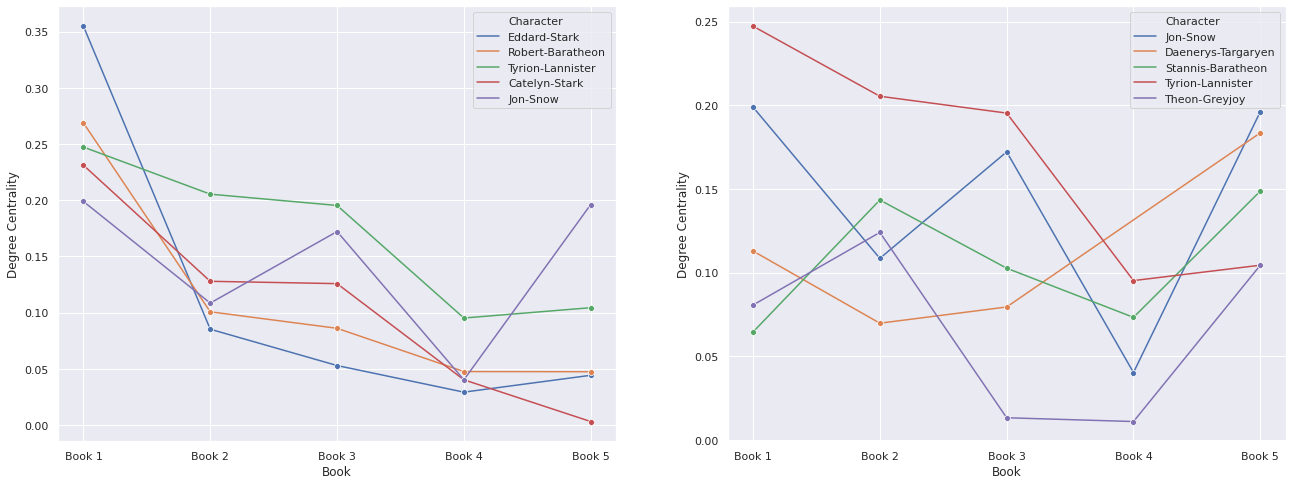

In [21]:
fig,axes = plt.subplots(1,2,figsize=(22,8))
sns.lineplot(x=evol1['Book'], y=evol1['Degree Centrality'], hue=evol1['Character'],
             marker = 'o', dashes=False,
             ax=axes[0])
sns.lineplot(x=evol5['Book'], y=evol5['Degree Centrality'], hue=evol5['Character'],
             marker = 'o', dashes=False,
             ax=axes[1])

## Betweennes Centrality

In [22]:
bc_book = {}
for i in range(len(book_list)):
  bc = nx.betweenness_centrality(G[i])
  bc_book[i] = sorted(bc.items(), key=lambda x:x[1], reverse=True)

bc_book_df = []
for i in range(len(book_list)):
  bc_book_df.append(pd.DataFrame(bc_book[i]))
  bc_book_df[i] = bc_book_df[i].rename(columns={0:'Character',1:'Betweennes Centrality'}, inplace=False)
  bc_book_df[i].insert(0,'Book','Book %d' %(i+1) )

for i in range(len(book_list)):
  print('Book ', i+1, '\n', bc_book_df[i].head(),  '\n')

Book  1 
      Book         Character  Betweennes Centrality
0  Book 1      Eddard-Stark               0.269604
1  Book 1  Robert-Baratheon               0.214030
2  Book 1  Tyrion-Lannister               0.190212
3  Book 1          Jon-Snow               0.171581
4  Book 1     Catelyn-Stark               0.151395 

Book  2 
      Book         Character  Betweennes Centrality
0  Book 2        Arya-Stark               0.188170
1  Book 2          Jon-Snow               0.174439
2  Book 2        Robb-Stark               0.164438
3  Book 2  Tyrion-Lannister               0.155338
4  Book 2  Robert-Baratheon               0.153744 

Book  3 
      Book          Character  Betweennes Centrality
0  Book 3           Jon-Snow               0.223829
1  Book 3   Robert-Baratheon               0.166435
2  Book 3         Robb-Stark               0.162321
3  Book 3   Tyrion-Lannister               0.154091
4  Book 3  Joffrey-Baratheon               0.141891 

Book  4 
      Book          Character  

In [23]:
# we take top 5 character in book 1 and book 5
char1 = list(bc_book_df[0]['Character'].head())

evol1 = []
for i in range(nbook_list):
  for j in range(len(char1)):
    evol1.append(bc_book_df[i][bc_book_df[i]['Character']==char1[j]])
evol1 = pd.concat(evol1)
evol1 = evol1.reset_index(inplace=False)
evol1 = evol1.drop(['index'], axis=1)

# we take top 5 character in book 5
char5 = list(bc_book_df[4]['Character'].head())

evol5 = []
for i in range(nbook_list):
  for j in range(len(char5)):
    evol5.append(bc_book_df[i][bc_book_df[i]['Character']==char5[j]])
evol5 = pd.concat(evol5)
evol5 = evol5.reset_index(inplace=False)
evol5 = evol5.drop(['index'], axis=1)

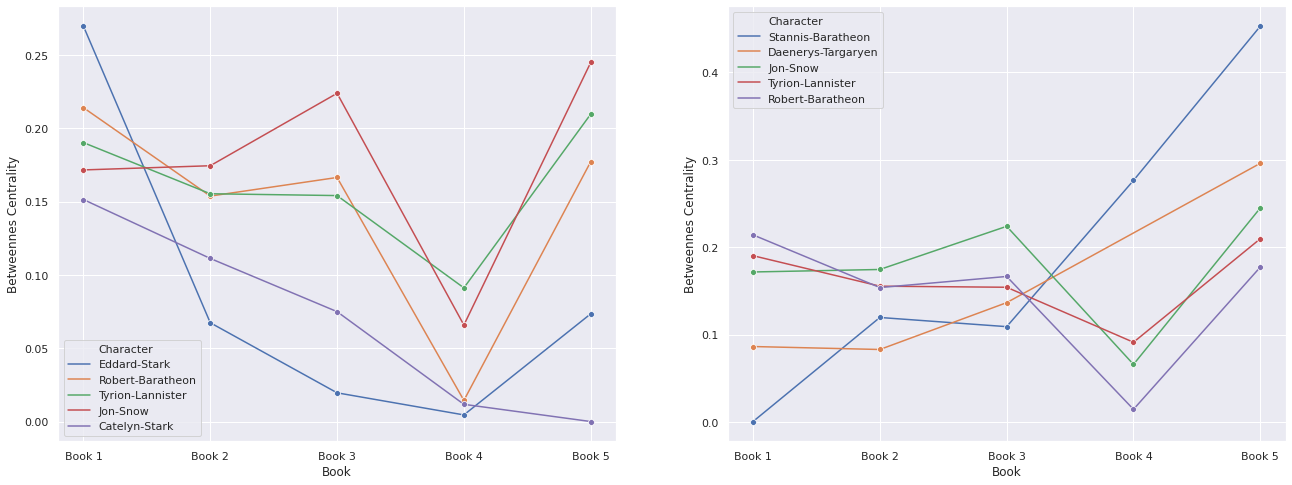

In [24]:
fig,axes = plt.subplots(1,2,figsize=(22,8))
sns.lineplot(x=evol1['Book'], y=evol1['Betweennes Centrality'], hue=evol1['Character'],
             marker = 'o', dashes=False,
             ax=axes[0])
sns.lineplot(x=evol5['Book'], y=evol5['Betweennes Centrality'], hue=evol5['Character'],
             marker = 'o', dashes=False,
             ax=axes[1])